<h1>Taylor Swift YouTube Channel Dataset<h1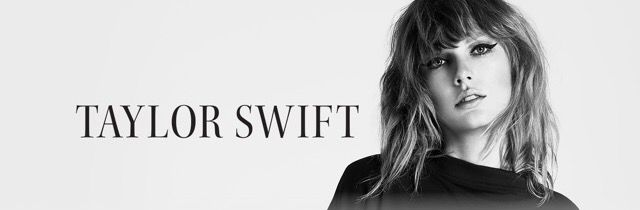>

<div>
<img src="ts_h.jfif" width="700"/>
</div>

<h3>This dataset was created using the YouTube API v3 and contains statistics for Taylor Swift's YouTube channel.</h3> 

<h3>The dataset includes information such as the number of subscribers, total views, and top-performing videos.</h3> 
    
<h3>The data can be used to analyze the popularity of Taylor Swift's YouTube channel and gain insights into her audience and content performance.</h3>

----------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------

<h3>Got an authorization credential from Google Developers Console,  AKA my api key:</h3>

In [2]:
#My API key
api_key = "***********"

<h3>Taylor Swift youtube channel ID:</h3>

In [3]:
channel_ids = ["UCqECaJ8Gagnn7YCbPEzWH6g",]

In [4]:
#importing necessary libraries
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON

In [5]:
#create an API client
api_service_name = "youtube"
api_version = "v3"
    
youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [6]:
#creating a function to get statistics of the channel
def get_channel_stats(youtube, channel_ids):

  all_data = []

  request = youtube.channels().list(
      part="snippet,contentDetails,statistics",
      id=','.join(channel_ids)
    )
  response = request.execute()

  for item in response['items']:
      data = {'channelName': item['snippet']['title'],
            'subscribers': item['statistics']['subscriberCount'],
            'views': item['statistics']['viewCount'],
            'totalVideo': item['statistics']['videoCount'],
            'playList': item['contentDetails']['relatedPlaylists']['uploads']
      }

      all_data.append(data)
      
  return(pd.DataFrame(all_data))

<h3>Here we see that Taylor swift's youtube channel has more than 50 million subscribers and more that 28 billion views!</h3>

In [7]:
channel_stats = get_channel_stats(youtube, channel_ids)
channel_stats

,channelName,subscribers,views,totalVideo,playList
0,Taylor Swift,51700000,28878155116,212,UUqECaJ8Gagnn7YCbPEzWH6g


In [8]:
#The ID that we got from channel_stats:
playlist_id = "UUqECaJ8Gagnn7YCbPEzWH6g"

#creating a function to get all video IDs pf Taylor's channel
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50)
    response = request.execute()
    
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    #continue getting video IDs until to get all of them
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId = playlist_id,
                        maxResults = 50,
                        pageToken = next_page_token)
            response = request.execute()
    
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            
            next_page_token = response.get('nextPageToken')
        
    return video_ids

<h3>There are 474 videos in her channel:</h3>

In [10]:
video_ids = get_video_ids(youtube, playlist_id)
len(video_ids)

474

In [11]:
#getting video statistics of all videos
def get_video_details(youtube, video_ids):
        
    all_video_info = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute() 
        
        #statistics of videos
        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']
                            }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
       #getting in a dataframe format     
    return pd.DataFrame(all_video_info)

<h3>The dataset based on Taylor's channel statistics:</h3>

In [12]:
video_df = get_video_details(youtube, video_ids)
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,YvyeAwoZ76w,Taylor Swift,It fills me with such pride & joy to announce ...,,None,2023-05-06T04:06:59Z,158381,46112,None,1658,PT7S,hd,false
1,anqxTwGE_nQ,Taylor Swift,Taylor Swift - Lavender Haze (Acoustic Version),Listen to “Lavender Haze (Acoustic Version)” b...,"[taylor swift midnights, taylor swift, midnigh...",2023-03-31T04:00:01Z,1007150,67534,None,3373,PT3M,hd,false
2,kE31ShDEOwg,Taylor Swift,Taylor Swift - Lavender Haze (Snakehips Remix),Listen to “Lavender Haze (Snakehips Remix)” by...,"[lavender haze, taylor swift, taylor swift lav...",2023-03-03T05:00:29Z,482602,14900,None,894,PT3M11S,hd,false
3,nfFujEdM0_E,Taylor Swift,Taylor Swift - Lavender Haze (Jungle Remix),Listen to “Lavender Haze (Jungle Remix)” by Ta...,"[lavender haze, taylor swift, taylor swift lav...",2023-03-03T05:00:23Z,202139,13488,None,1028,PT3M59S,hd,false
4,ZZtamrXjB_w,Taylor Swift,Taylor Swift - Lavender Haze (Tensnake Remix),Listen to “Lavender Haze (Tensnake)” by Taylor...,"[lavender haze, taylor swift, taylor swift lav...",2023-03-03T05:00:16Z,189231,13601,None,758,PT3M38S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Mi-FBBqUuJE,Taylor Swift,First fans with my CMT Award.,I made you a promise to bring my CMT Award out...,"[Taylor, Swift, CMT, Award, Fans]",2008-06-26T21:55:43Z,306810,2671,None,183,PT11S,sd,false
470,p-5R0u3iTiE,Taylor Swift,TRL Recap!,I took my camera to TRL -- this is the result....,"[Taylor, Swift, TRL, MTV, Total, Request, Live...",2008-06-26T21:15:51Z,695453,6435,None,727,PT3M8S,sd,false
471,C7I3_yFQYkc,Taylor Swift,Wannabe,Wannabe\n\nShop music here: http://smarturl.it...,"[Taylor, Swift, Wannabe, Spice, Girls]",2008-06-26T21:02:39Z,1156657,15789,None,1365,PT3M45S,sd,false
472,pA1dPsnfams,Taylor Swift,:-),Unexplainable.\n\nShop music here: http://smar...,"[Taylor, Swift, Kellie, Pickler, Funny]",2008-06-26T20:51:09Z,668067,11368,None,961,PT34S,sd,false


In [23]:
#saving to a .csv file 
video_df.to_csv('youtube_ts.csv', index = False)

In [27]:
#saving to an excel file
from pandas.io.formats.excel import ExcelFormatter

video_df.to_excel('youtube_ts.xlsx', index = False)